# Try-out: Problem 4 of M4 Engineering Systems test

##### Initialization

In [1]:
from scipy import signal
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
import matplotlib.image as mpimg

### The model

Consider the model of a prehistoric fire making device, consisting of a rod that is brought in rotation by a bow and a sting that is wound around the rod. The end of the rod is positioned in a shallow hole, in order to get dissipation of energy due to the friction. The rod is not completely rigid as ;you can get from the schematic model. 

##### Schematic drwawig of the model <img src="img/FireFriction.png" style="width:600px">

##### Parameters

For the parameters take the values given below.

In [2]:
m = 1.0   # kilo gram
k1 = 0.5 
R = 1.0
J1 = 1.0
J2 = 2.0
B1 = 4.0
B2 = 13.0
k2 = 11.0

#### State-Space Model

Starting with writing down the element equations, that are either algebraic or linar differential, and the coupling equations between the translational and rotation motion, you can combine those in a State-Space model. 

The matrisces are given by:
$$
\mathbb{A} = \left(
\begin{matrix}
0 & \frac{1}{m} & 0 & 0 & 0 \\
-2 k_1 & 0 & -2 k_1 R & 0 & 0 \\
0 & \frac{R}{J_1} & -\frac{B_1}{J_1} & 0 & -\frac{1}{J_1} \\
0 & 0 & 0 & -\frac{B_2}{J_2} & \frac{1}{J_2} \\
0 & 0 & k_2 & -k_2 & 0 
\end{matrix}
\right),
\;
B = \left(
\begin{matrix}
\frac{1}{m} \\ 0 \\ 0 \\ 0 \\ 0
\end{matrix}
\right),
\;
C = \left(
\begin{matrix}
0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & B_2 & 0 \\ 
\end{matrix}
\right),
\;
D = \left(
\begin{matrix}
0 \\ 0
\end{matrix}
\right).
$$

Put the matrices in python:

In [3]:
aa = np.array([[0, 1/m, 0, 0, 0],[-2*k1, 0, -2*k1*R, 0, 0], [0, R/J1, -B1/J1, 0, -1/J1],[0, 0, 0, -B2/J2, 1/J2], [0, 0, k2, -k2, 0]])
bb = np.array([[1/m],[0],[0],[0],[0]])
cc = np.array([[0, 0, 0, 1, 0],[0, 0, 0, B2, 0]])
dd = np.array([[0],[0]])
sys4 = signal.StateSpace(aa, bb, cc, dd)
print("System 4 in State-Space is: ",sys4)

System 4 in State-Space is:  StateSpaceContinuous(
array([[  0. ,   1. ,   0. ,   0. ,   0. ],
       [ -1. ,   0. ,  -1. ,   0. ,   0. ],
       [  0. ,   1. ,  -4. ,   0. ,  -1. ],
       [  0. ,   0. ,   0. ,  -6.5,   0.5],
       [  0. ,   0. ,  11. , -11. ,   0. ]]),
array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]]),
array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., 13.,  0.]]),
array([[0],
       [0]]),
dt: None
)


##### Determine the dynamic behaviour of the system by calculating the eiven values of the A-Matrix.

In [4]:
eig4 = linalg.eigvals(aa)
print('The eigenvalues of the A-matrix are: ',eig4)

The eigenvalues of the A-matrix are:  [-0.03558575+0.97888886j -0.03558575-0.97888886j -2.21254892+3.36686895j
 -2.21254892-3.36686895j -6.00373065+0.j        ]


This is a pasive system, so all eigen values should have a non-positive real part. This is correct. 

##### Determine the Transfer Function and the ZerosPolesGain representation of the model.

A remark has te be made here. A tranformation of a State-space model to a transfer function model, results in an array of numerator polynomial coefficients (for all input-output combination one) and one array with the denominator polynomial coefficients. The implemtation for the calculation of poles, zeros and a ZerosPolesGain representation of the state-space model does not work correctly. Therefor, the tranfer function object is pulled appart in separate transferfunction models, reconstructed from the array's. 

In [5]:
tf4 = sys4.to_tf()
print('The transfer functions are: ',tf4)
tf4a=signal.TransferFunction(tf4.num[0],tf4.den)
print('The first transferfunction is: ',tf4a)
zpk4a = tf4a.to_zpk()
print('The ZerosPolesGain model of the first input is: ', zpk4a)
tf4b=signal.TransferFunction(tf4.num[1],tf4.den)
print('The second transferfunction is: ',tf4b)
zpk4b = tf4a.to_zpk()
print('The ZerosPolesGain model is: ', zpk4b)
#print(type(sys4))
zeros4 = tf4a.zeros
print('The zeros of the sytem are: ',zeros4)
poles4 = tf4a.poles
print('The poles of the sytem are: ',poles4)

The transfer functions are:  TransferFunctionContinuous(
array([[ 4.97379915e-14,  2.13162821e-13,  6.39488462e-14,
        -5.50000000e+00],
       [ 9.23705556e-14,  3.41060513e-13,  2.06057393e-13,
        -7.15000000e+01]]),
array([  1. ,  10.5,  44.5, 110.5,  48. ,  93.5]),
dt: None
)
The first transferfunction is:  TransferFunctionContinuous(
array([ 4.97379915e-14,  2.13162821e-13,  6.39488462e-14, -5.50000000e+00]),
array([  1. ,  10.5,  44.5, 110.5,  48. ,  93.5]),
dt: None
)
The ZerosPolesGain model of the first input is:  ZerosPolesGainContinuous(
array([-24000.52108402+41567.64750918j, -24000.52108402-41567.64750918j,
        47996.75645376    +0.j        ]),
array([-6.00373065+0.j        , -2.21254892+3.36686895j,
       -2.21254892-3.36686895j, -0.03558575+0.97888886j,
       -0.03558575-0.97888886j]),
4.973799150320701e-14,
dt: None
)
The second transferfunction is:  TransferFunctionContinuous(
array([ 9.23705556e-14,  3.41060513e-13,  2.06057393e-13, -7.15000000e+01]),


C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1619: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  "results may be meaningless", BadCoefficients)


##### Bode-plots of the system

Bode plots of the system. They only differ in the output of the variables, which should only have effect on the numerator of the transfer function (positive phase part).

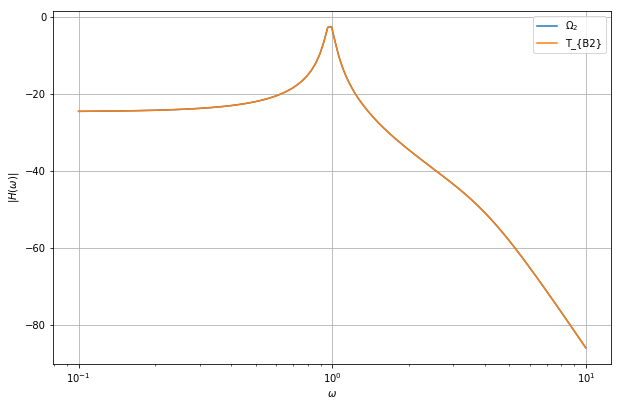

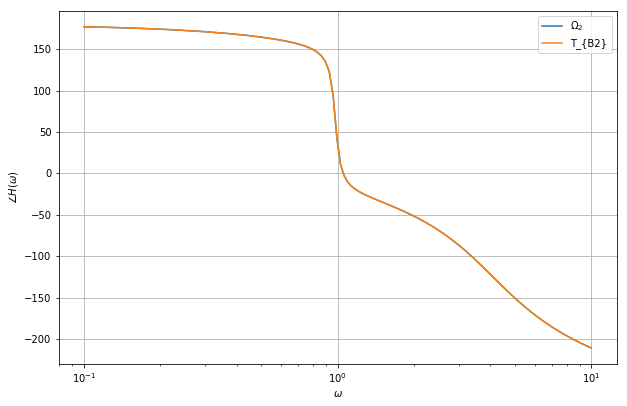

In [6]:
ws = np.linspace(0.1, 10, 300)
wa, maga, phasea = tf4a.bode(ws)
wb, magb, phaseb = tf4b.bode(ws)
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, maga, label = r'$\Omega_2$')    # Bode magnitude plot system 1
plt.semilogx(wa, maga, label = r'T_{B2}')    # Bode magnitude plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$|H(\omega)|$')
plt.grid(True)
plt.legend()
plt.figure(figsize=(10,6.5))
plt.semilogx(wa, phasea, label = r'$\Omega_2$')  # Bode phase plot system 1
plt.semilogx(wb, phaseb, label = r'T_{B2}')  # Bode phase plot system 3
plt.xlabel (r'$\omega$')
plt.ylabel (r'$\angle H(\omega)$')
plt.legend()
plt.grid(True)
plt.show()

##### Time-response to a unit step function

For an imput of a unit step function, we have to set the initial conditions for the state-space variables; in this situation all zero. 

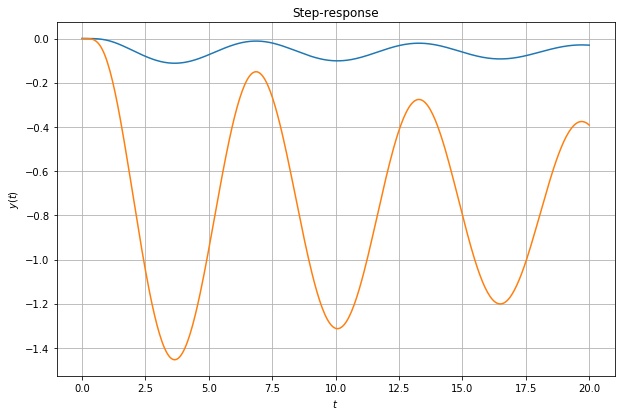

In [7]:
t4 = np.linspace(0, 20, num=400)
u4 = 1.0*np.ones_like(t4)
init = [0, 0, 0, 0, 0]
tout4, y4, x4 = signal.lsim(sys4, u4, t4, X0=init)
plt.figure(figsize=(10,6.5))
plt.plot(t4, y4,label='step-response')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Step-response')
plt.grid(True)
plt.show()

##### Now with a harmonic drive force as input

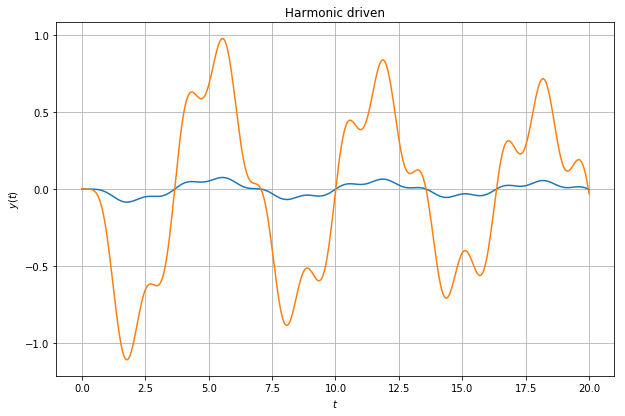

In [13]:
x4 = 5.0*np.sin(4*t4)
init = [0, 0, 0, 0, 0]
tout4b, y4b, x4b = signal.lsim(sys4, x4, t4, X0=init)
plt.figure(figsize=(10,6.5))
plt.plot(t4, y4b,label='Harmonic driven')
plt.xlabel (r'$t$')
plt.ylabel (r'$y(t)$')
plt.title('Harmonic driven')
plt.grid(True)
plt.show()

The frequency of the driving force can be observed in the output (high frequency component). The low frequency component is the natural frequency of the system -- also observed in the Step response. 

#### Conclusions